# Actividad 5: Modelos Lineales y Correlación

Este notebook explora relaciones entre variables mediante modelos lineales y cálculo de correlación.

## Objetivos
- Aplicar regresión lineal entre variables.
- Calcular e interpretar el coeficiente R².
- Graficar la línea de regresión.
- Obtener matriz de correlación.


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

sns.set(style="whitegrid")
%matplotlib inline


In [11]:
df = pd.read_csv('../1_data_cleaning/dataset_limpio.csv')
df.head()


,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,...,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009-01-01,936.0,7.9,33000
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007-01-01,5000.0,7.1,0
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,...,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015-01-01,393.0,6.8,85000
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012-01-01,23000.0,8.5,164000
4,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012-01-01,632.0,6.6,24000


In [12]:
df = df[df['budget'] < 3e8]

In [13]:
df['budget_log'] = np.log1p(df['budget'])  # log(1 + x) para evitar log(0)

In [14]:
X_log = df[['budget_log']]
y = df['imdb_score']

modelo_log = LinearRegression()
modelo_log.fit(X_log, y)

y_pred_log = modelo_log.predict(X_log)

print("Coeficiente R²:", r2_score(y, y_pred_log))
print("Pendiente:", modelo_log.coef_[0])
print("Intercepción:", modelo_log.intercept_)


Coeficiente R²: 1.7590731771210955e-06
Pendiente: -0.0008748536643569332
Intercepción: 6.4326411477096785


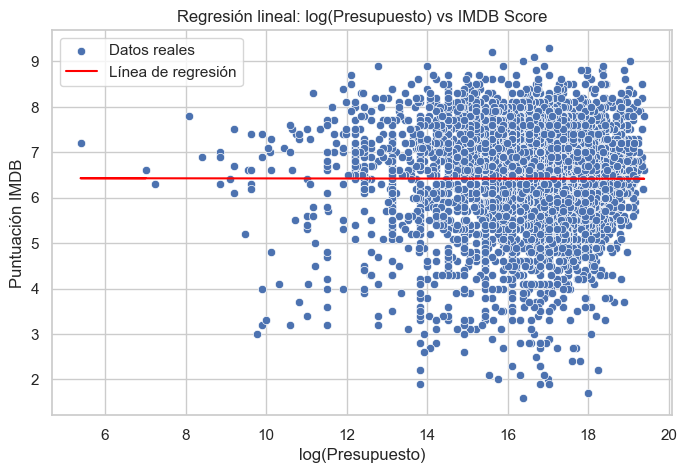

In [15]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['budget_log'], y=df['imdb_score'], label='Datos reales')
plt.plot(df['budget_log'], y_pred_log, color='red', label='Línea de regresión')
plt.title('Regresión lineal: log(Presupuesto) vs IMDB Score')
plt.xlabel('log(Presupuesto)')
plt.ylabel('Puntuación IMDB')
plt.legend()
plt.show()


## Conclusión

Se construyó un modelo de regresión lineal para analizar la relación entre el presupuesto y la calificación IMDB de las películas.

Inicialmente, los datos presentaban una alta concentración de valores bajos y algunos valores extremos que afectaban la visualización y el ajuste del modelo. Para mejorar la interpretación:

- Se eliminaron outliers con presupuestos excesivos (mayores a 300 millones).
- Se aplicó una transformación logarítmica al presupuesto para estabilizar la varianza y distribuir mejor los datos.

A pesar de estas mejoras, la línea de regresión mostró una pendiente casi nula y un coeficiente de determinación (R²) muy bajo, indicando que **el presupuesto no tiene una relación lineal fuerte con la calificación IMDB**.

Este resultado sugiere que factores distintos al presupuesto (como dirección, guion, actuaciones, etc.) pueden tener mayor influencia en la percepción y evaluación de una película. El análisis lineal cumple su propósito al revelar esta falta de asociación significativa.
